# Clean multilevel table
* notebook: https://github.com/prasertcbs/pandas/blob/main/pandas_clean_multilevel_table.ipynb
* data source:
    * starbucks nutrition: https://www.starbucks.ca/menu/nutrition-info
    * starbucks bakery nutrition: https://globalassets.starbucks.com/assets/c4874ecf0a8b418f9436b1f1900cc2fa.pdf

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

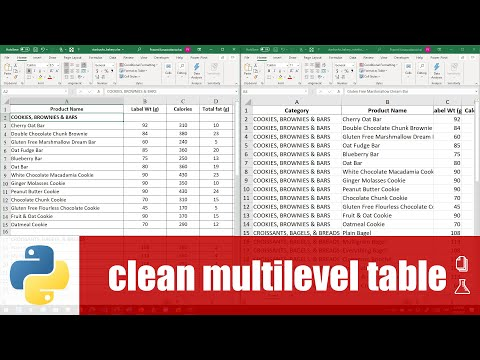

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('3PZO2gp6FqY', width=720, height=405)

In [2]:
import sys
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

%config InlineBackend.figure_format='retina'

In [3]:
print(f'Python version:  {sys.version}')
print(f'pandas version:  {pd.__version__}')

pd.Timestamp.now()

Python version:  3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
pandas version:  1.2.1


Timestamp('2021-02-12 14:27:19.992707')

## read data

In [4]:
df=pd.read_excel('https://github.com/prasertcbs/basic-dataset/raw/master/starbucks_bakery.xlsx')
df

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15
5,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10
6,Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10
7,White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10
8,Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20
9,Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10


In [5]:
df=df.dropna(subset=['Product Name']).reset_index(drop=True) # blank rows
df

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15
5,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10
6,Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10
7,White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10
8,Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20
9,Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product Name        53 non-null     object 
 1   Label Wt (g)        48 non-null     float64
 2   Calories            48 non-null     float64
 3   Total fat (g)       48 non-null     float64
 4   Saturated  Fat (g)  48 non-null     float64
 5   Trans Fat (g)       48 non-null     float64
 6   Cholesterol (mg)    48 non-null     float64
 7   Sodium (mg)         48 non-null     float64
 8   Carbohydrates (g)   48 non-null     float64
 9   Fiber (g)           48 non-null     float64
 10  Sugar (g)           48 non-null     float64
 11  Protein (g)         48 non-null     float64
 12  Vitamin A (%DV)     48 non-null     float64
 13  Vitamin C (%DV)     48 non-null     float64
 14  Calcium (%DV)       48 non-null     float64
 15  Iron (%DV)          48 non-null     float64
dtypes: float64

In [7]:
df.loc[0, :]

Product Name          COOKIES, BROWNIES & BARS
Label Wt (g)                               NaN
Calories                                   NaN
Total fat (g)                              NaN
Saturated  Fat (g)                         NaN
Trans Fat (g)                              NaN
Cholesterol (mg)                           NaN
Sodium (mg)                                NaN
Carbohydrates (g)                          NaN
Fiber (g)                                  NaN
Sugar (g)                                  NaN
Protein (g)                                NaN
Vitamin A (%DV)                            NaN
Vitamin C (%DV)                            NaN
Calcium (%DV)                              NaN
Iron (%DV)                                 NaN
Name: 0, dtype: object

In [8]:
df.loc[1, :]

Product Name          Cherry Oat Bar
Label Wt (g)                    92.0
Calories                       310.0
Total fat (g)                   10.0
Saturated  Fat (g)               6.0
Trans Fat (g)                    0.0
Cholesterol (mg)                35.0
Sodium (mg)                    240.0
Carbohydrates (g)               47.0
Fiber (g)                        2.0
Sugar (g)                       28.0
Protein (g)                      3.0
Vitamin A (%DV)                  0.2
Vitamin C (%DV)                 0.02
Calcium (%DV)                    0.0
Iron (%DV)                       0.2
Name: 1, dtype: object

In [9]:
type(df.loc[0, 'Calories'])

numpy.float64

In [10]:
np.isnan(df.loc[0, 'Calories']) # check numpy.float64 isnan

True

In [11]:
np.isnan(df.loc[1, 'Calories']) # check numpy.float64 isnan

False

In [12]:
df.apply(lambda r: r['Product Name'] if np.isnan(r['Calories']) else np.nan, axis=1)

0              COOKIES, BROWNIES & BARS
1                                   NaN
2                                   NaN
3                                   NaN
4                                   NaN
5                                   NaN
6                                   NaN
7                                   NaN
8                                   NaN
9                                   NaN
10                                  NaN
11                                  NaN
12                                  NaN
13                                  NaN
14         CROISSANTS, BAGELS, & BREADS
15                                  NaN
16                                  NaN
17                                  NaN
18                                  NaN
19                                  NaN
20                                  NaN
21                                  NaN
22                                  NaN
23                                  NaN
24                                  NaN


In [13]:
df['Category']=df.apply(lambda r: r['Product Name'] if np.isnan(r['Calories']) else np.nan, axis=1)
df

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),Category
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"COOKIES, BROWNIES & BARS"
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20,NaN
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15,NaN
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02,NaN
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15,NaN
5,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10,NaN
6,Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10,NaN
7,White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10,NaN
8,Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20,NaN
9,Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10,NaN


In [14]:
df['Category']=df['Category'].ffill() # forward fill

In [15]:
df

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),Category
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"COOKIES, BROWNIES & BARS"
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20,"COOKIES, BROWNIES & BARS"
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15,"COOKIES, BROWNIES & BARS"
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02,"COOKIES, BROWNIES & BARS"
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15,"COOKIES, BROWNIES & BARS"
5,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10,"COOKIES, BROWNIES & BARS"
6,Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10,"COOKIES, BROWNIES & BARS"
7,White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10,"COOKIES, BROWNIES & BARS"
8,Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20,"COOKIES, BROWNIES & BARS"
9,Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10,"COOKIES, BROWNIES & BARS"


In [16]:
df=df.dropna(subset=['Calories']).reset_index(drop=True) # blank rows
df

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),Category
0,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20,"COOKIES, BROWNIES & BARS"
1,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15,"COOKIES, BROWNIES & BARS"
2,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02,"COOKIES, BROWNIES & BARS"
3,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15,"COOKIES, BROWNIES & BARS"
4,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10,"COOKIES, BROWNIES & BARS"
5,Oat Bar,80.0,360.0,19.0,11.0,1.0,40.0,220.0,43.0,5.0,12.0,6.0,0.20,0.00,0.00,0.10,"COOKIES, BROWNIES & BARS"
6,White Chocolate Macadamia Cookie,90.0,430.0,23.0,12.0,0.3,55.0,270.0,51.0,1.0,33.0,5.0,0.15,0.00,0.04,0.10,"COOKIES, BROWNIES & BARS"
7,Ginger Molasses Cookie,90.0,350.0,10.0,6.0,0.2,50.0,250.0,59.0,1.0,35.0,5.0,0.10,0.00,0.08,0.20,"COOKIES, BROWNIES & BARS"
8,Peanut Butter Cookie,90.0,430.0,24.0,9.0,0.3,60.0,370.0,44.0,2.0,27.0,9.0,0.15,0.00,0.02,0.10,"COOKIES, BROWNIES & BARS"
9,Chocolate Chunk Cookie,70.0,310.0,15.0,9.0,0.3,50.0,260.0,42.0,2.0,27.0,4.0,0.10,0.00,0.02,0.15,"COOKIES, BROWNIES & BARS"


In [17]:
df.groupby('Category').describe()

Label Wt (g)                               \
                                         count        mean        std   min   
Category                                                                      
COOKIES, BROWNIES & BARS                  13.0   78.538462  14.163423  45.0   
CROISSANTS, BAGELS, & BREADS              13.0   97.692308  14.109008  64.0   
DOUGHNUTS, SWEET ROLLS & DANISHES          4.0  102.750000  17.327723  80.0   
LOAVES, COFFEE CAKES, CAKE POPS            9.0   98.888889  34.016336  38.0   
MUFFINS & SCONES                           9.0  102.333333  26.348624  33.0   

                                                               Calories  \
                                      25%    50%    75%    max    count   
Category                                                                  
COOKIES, BROWNIES & BARS            70.00   84.0   90.0   92.0     13.0   
CROISSANTS, BAGELS, & BREADS        92.00   99.0  108.0  113.0     13.0   
DOUGHNUTS, SWEET ROLLS & DANISHES   94.25  106.0  114.5  119.0      4.0   
LOAVES, COFFEE CAKES, CAKE POPS    100.00  115.0  118.0  126.0      9.0   
MUFFINS & SCONES                   110.00  113.0  113.0  113.0      9.0   

                                               ... Calcium (%DV)        \
                                         mean  ...           75%   max   
Category                                       ...                       
COOKIES, BROWNIES & BARS           326.923077  ...         0.040  0.20   
CROISSANTS, BAGELS, & BREADS       311.538462  ...         0.080  0.20   
DOUGHNUTS, SWEET ROLLS & DANISHES  405.000000  ...         0.045  0.06   
LOAVES, COFFEE CAKES, CAKE POPS    368.888889  ...         0.040  0.06   
MUFFINS & SCONES                   364.444444  ...         0.040  0.06   

                                  Iron (%DV)                                  \
                                       count      mean       std   min   25%   
Category                                                                       
COOKIES, BROWNIES & BARS                13.0  0.124615  0.048754  0.02  0.10   
CROISSANTS, BAGELS, & BREADS            13.0  0.169231  0.085485  0.00  0.10   
DOUGHNUTS, SWEET ROLLS & DANISHES        4.0  0.115000  0.057446  0.08  0.08   
LOAVES, COFFEE CAKES, CAKE POPS          9.0  0.134444  0.077800  0.00  0.10   
MUFFINS & SCONES                         9.0  0.128889  0.081001  0.02  0.10   

                                                      
                                    50%    75%   max  
Category                                              
COOKIES, BROWNIES & BARS           0.10  0.150  0.20  
CROISSANTS, BAGELS, & BREADS       0.15  0.200  0.30  
DOUGHNUTS, SWEET ROLLS & DANISHES  0.09  0.125  0.20  
LOAVES, COFFEE CAKES, CAKE POPS    0.15  0.200  0.25  
MUFFINS & SCONES                   0.10  0.150  0.25  

[5 rows x 120 columns]

In [18]:
df.columns

Index(['Product Name', 'Label Wt (g)', 'Calories', 'Total fat (g)',
       'Saturated  Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)',
       'Sodium (mg)', 'Carbohydrates (g)', 'Fiber (g)', 'Sugar (g)',
       'Protein (g)', 'Vitamin A (%DV)', 'Vitamin C (%DV)', 'Calcium (%DV)',
       'Iron (%DV)', 'Category'],
      dtype='object')

In [19]:
df[['Category', 'Product Name', 'Label Wt (g)', 'Calories', 'Total fat (g)',
       'Saturated  Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)',
       'Sodium (mg)', 'Carbohydrates (g)', 'Fiber (g)', 'Sugar (g)',
       'Protein (g)', 'Vitamin A (%DV)', 'Vitamin C (%DV)', 'Calcium (%DV)',
       'Iron (%DV)']].to_csv('bakery_clean.csv', index=False)

In [20]:
df[['Category', 'Product Name', 'Label Wt (g)', 'Calories', 'Total fat (g)',
       'Saturated  Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)',
       'Sodium (mg)', 'Carbohydrates (g)', 'Fiber (g)', 'Sugar (g)',
       'Protein (g)', 'Vitamin A (%DV)', 'Vitamin C (%DV)', 'Calcium (%DV)',
       'Iron (%DV)']].to_excel('bakery_clean.xlsx', index=False)